<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 23.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 22.1 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (7

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from bertopic import BERTopic
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# Loading the dataset
data = pd.read_csv("/content/imdb_reviews_dataset.csv")

# Preprocessing the text data
def preprocess_data(doc_set):
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []
    for i in doc_set:
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts

# Calling the preprocess_data
preprocessed_reviews = preprocess_data(data['Review'])

print(preprocessed_reviews)

[['man', 'wish', 'love', 'movi', 'get', 'wrong', 'solid', 'action', 'movi', 'jaw', 'drop', 'stunt', 'best', 'seri', 'mission', 'imposs', 'movi', 'felt', 'like', 'small', 'step', 'backward', 'franchis', 'fallout', 'mind', 'blow', 'action', 'sequenc', 'stunt', 'work', 'along', 'develop', 'ethan', 'relationship', 'ilsa', 'provid', 'closur', 'julia', 'show', 'length', 'ethan', 'would', 'go', 'protect', 'closest', 'battl', 'impos', 'villain', 'dead', 'reckon', 'part', 'one', 'stretch', 'movi', 'across', 'two', 'film', 'seemingli', 'showcas', 'action', 'spectacl', 'action', 'spectacl', 'sacrif', 'charact', 'develop', 'charact', 'grown', 'love', 'decad', 'film', 'felt', 'sidelin', 'ignor', 'wast', 'hayley', 'atwel', 'new', 'charact', 'chew', 'screen', 'time', 'fantast', 'want', 'see', 'origin', 'team', 'new', 'villain', 'inconsist', 'abil', 'confus', 'intimid', 'import', 'emot', 'moment', 'feel', 'weight', 'definit', 'part', 'two', 'might', 'tie', 'everyth', 'togeth', 'make', 'enjoy', 'part',

In [5]:
# Feature extraction
# Bag of Words
vectorizer_bow = CountVectorizer(max_features=1000, stop_words='english')
X_bow = vectorizer_bow.fit_transform(data['Review'])

# TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer_tfidf.fit_transform(data['Review'])

In [6]:
# Topic modeling with LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X_bow)
lda_topics = lda.components_

# Topic modeling with LSA
lsa = TruncatedSVD(n_components=10, random_state=42)
lsa.fit(X_tfidf)
lsa_topics = lsa.components_

# Topic modeling with BERTopic
bertopic_model = BERTopic()
topics, _ = bertopic_model.fit_transform(data['Review'])

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [15]:
# Summarize and describe topics
# For LDA and LSA
def get_top_words(topic_model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(topic_model):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words.append([feature_names[i] for i in top_words_idx])
    return top_words

# For BERTopic
def summarize_topics(topics):
    summarized_topics = {}
    for doc_id, topic in enumerate(topics):
        if topic not in summarized_topics:
            summarized_topics[topic] = []
        summarized_topics[topic].append(data.iloc[doc_id]['Review'])
    return summarized_topics

print("Top words for LDA:")
for i, topic_words in enumerate(get_top_words(lda_topics, vectorizer_bow.get_feature_names_out(), 10)):
    print(f"Topic {i}: {', '.join(topic_words)}")

print("\nTop words for LSA:")
for i, topic_words in enumerate(get_top_words(lsa_topics, vectorizer_tfidf.get_feature_names_out(), 10)):
    print(f"Topic {i}: {', '.join(topic_words)}")

print("\nSummarized topics for BERTopic:")
print(summarize_topics(topics))

Top words for LDA:
Topic 0: film, ethan, best, mission, like, action, impossible, cruise, franchise, previous
Topic 1: film, actually, fallout, ethan, way, scene, franchise, tom, cruise, action
Topic 2: key, long, did, hours, ll, 20, mention, don, wasn, literally
Topic 3: franchise, movie, impossible, mission, make, felt, action, ving, just, cruse
Topic 4: movie, like, great, tom, good, action, just, ve, really, 10
Topic 5: movie, action, stunts, mi, way, really, new, bad, character, make
Topic 6: grace, ethan, like, mi, movie, love, iisa, life, hayley, scenes
Topic 7: film, action, just, screen, scene, train, ethan, grace, hunt, cruise
Topic 8: cruise, film, mission, scene, movie, characters, scenes, fight, action, chase
Topic 9: just, don, scene, time, felt, things, really, like, especially, thing

Top words for LSA:
Topic 0: movie, film, cruise, ethan, like, just, franchise, action, scene, really
Topic 1: grace, ethan, hunt, train, cruise, mcquarrie, director, ai, piece, final
Topic

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

Why have I used these features for sentiment classification?

In [28]:
# Write your code here
# Importing the required modules
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [29]:
# Loading the dataset
data = pd.read_csv("/content/sentiment_imdb_reviews.csv")

# Spliting the data
X = data['Clean_Review']
y = data['sentiment']

# Preprocessing the text data and converting it into numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting to arrays
X_train = X_train.toarray()
X_test = X_test.toarray()

In [30]:
# Initializing the classifiers
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state=69)

# Training the classifiers
gnb.fit(X_train, y_train)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=69)

In [33]:
# Cross-validation (5-fold)
gnb_cv_scores = cross_val_score(gnb, X_train, y_train, cv=10)
dtc_cv_scores = cross_val_score(dtc, X_train, y_train, cv=10)

# Evaluation on the test set
gnb_pred = gnb.predict(X_test)
dtc_pred = dtc.predict(X_test)

In [34]:
# Calculate evaluation metrics
gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred, average='weighted')
gnb_recall = recall_score(y_test, gnb_pred, average='weighted')
gnb_f1 = f1_score(y_test, gnb_pred, average='weighted')

dtc_accuracy = accuracy_score(y_test, dtc_pred)
dtc_precision = precision_score(y_test, dtc_pred, average='weighted')
dtc_recall = recall_score(y_test, dtc_pred, average='weighted')
dtc_f1 = f1_score(y_test, dtc_pred, average='weighted')

# Print results
print("Gaussian Naive Bayes Classifier:")
print("Cross-Validation Accuracy:", gnb_cv_scores.mean())
print("Test Set Accuracy:", gnb_accuracy)
print("Test Set Precision:", gnb_precision)
print("Test Set Recall:", gnb_recall)
print("Test Set F1 Score:", gnb_f1)

from sklearn.metrics import classification_report

# Generate classification report for Gaussian Naive Bayes classifier
gnb_report = classification_report(y_test, gnb_pred)
print("Classification Report for Gaussian Naive Bayes Classifier:")
print(gnb_report)

print("\nDecision Tree Classifier:")
print("Cross-Validation Accuracy:", dtc_cv_scores.mean())
print("Test Set Accuracy:", dtc_accuracy)
print("Test Set Precision:", dtc_precision)
print("Test Set Recall:", dtc_recall)
print("Test Set F1 Score:", dtc_f1)

# Generate classification report for Decision Tree classifier
dtc_report = classification_report(y_test, dtc_pred)
print("\nClassification Report for Decision Tree Classifier:")
print(dtc_report)

Gaussian Naive Bayes Classifier:
Cross-Validation Accuracy: 1.0
Test Set Accuracy: 1.0
Test Set Precision: 1.0
Test Set Recall: 1.0
Test Set F1 Score: 1.0
Classification Report for Gaussian Naive Bayes Classifier:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        65
     neutral       1.00      1.00      1.00        59
    positive       1.00      1.00      1.00        76

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Decision Tree Classifier:
Cross-Validation Accuracy: 1.0
Test Set Accuracy: 1.0
Test Set Precision: 1.0
Test Set Recall: 1.0
Test Set F1 Score: 1.0

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        65
     neutral       1.00      1.00      1.00        59
    positive       1.00      1.00      1

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [35]:
# Write your code here
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

In [36]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [37]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

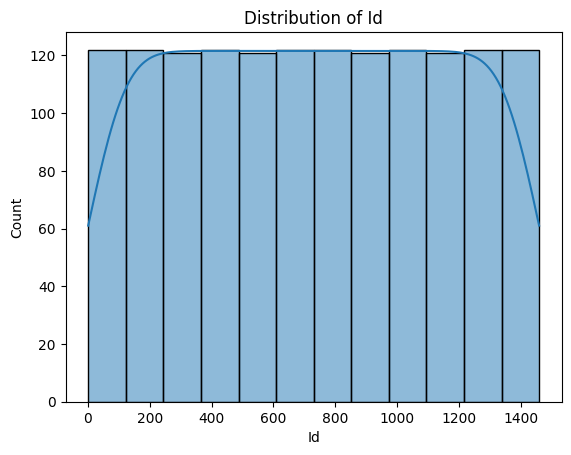

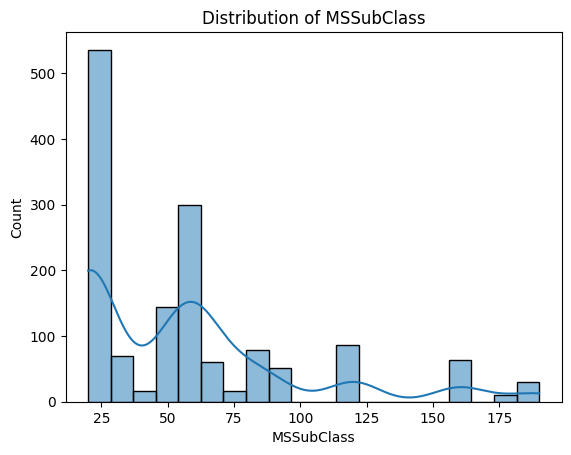

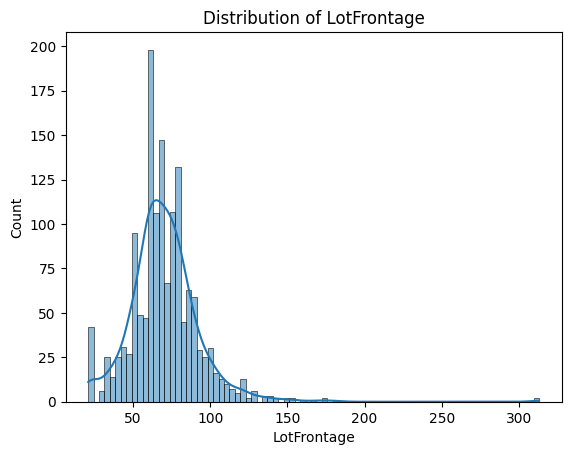

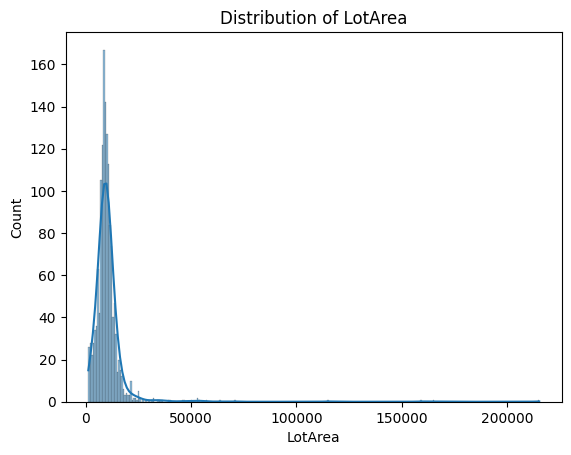

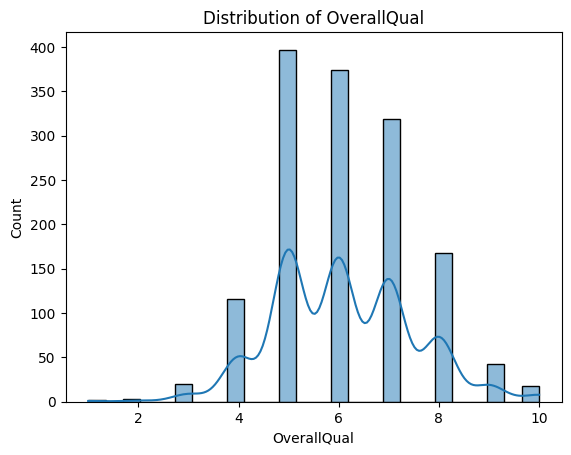

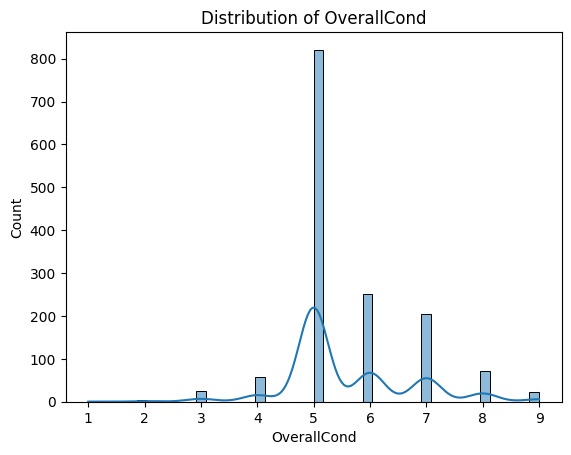

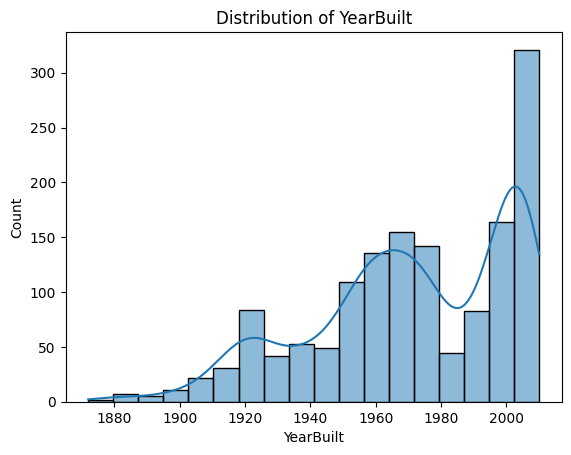

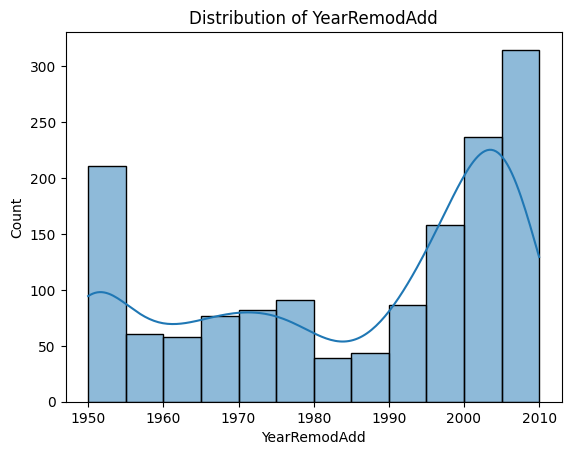

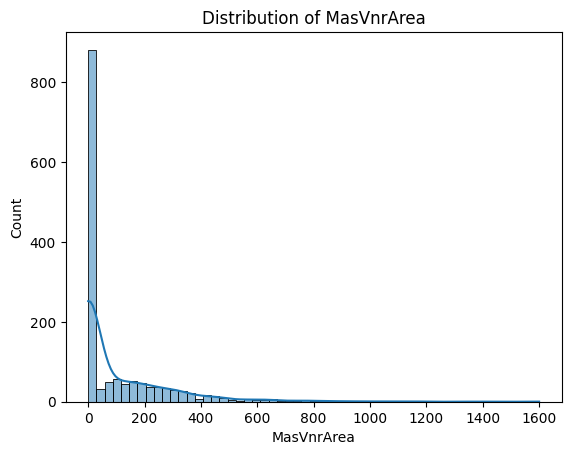

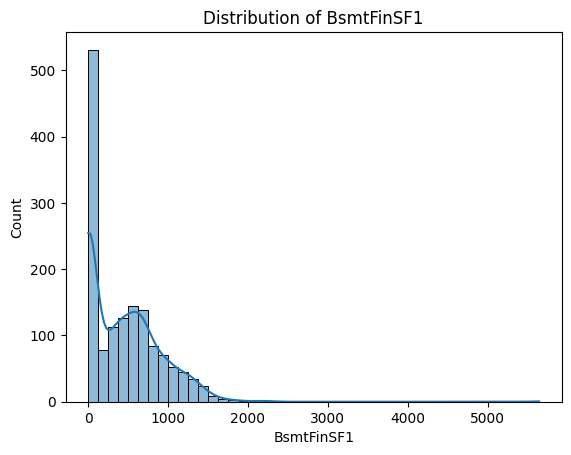

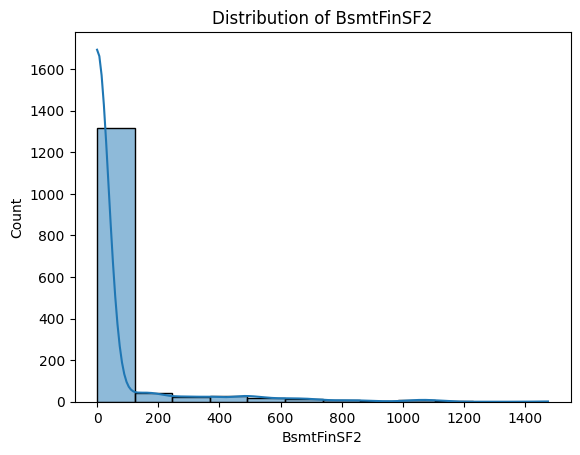

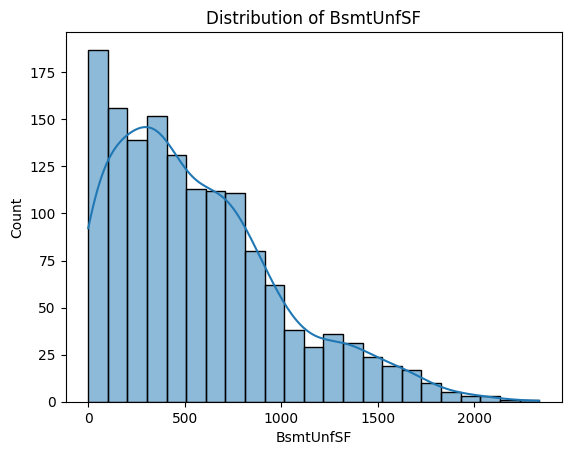

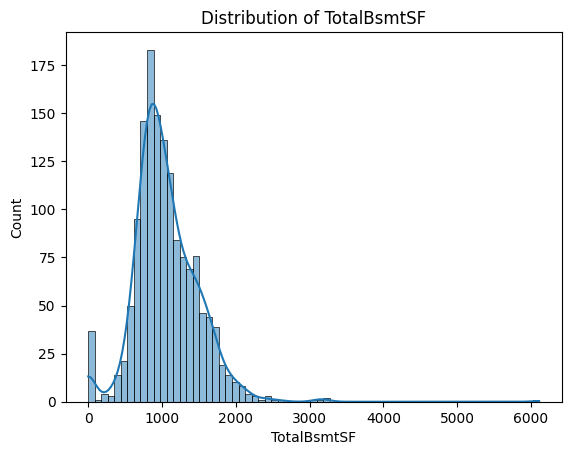

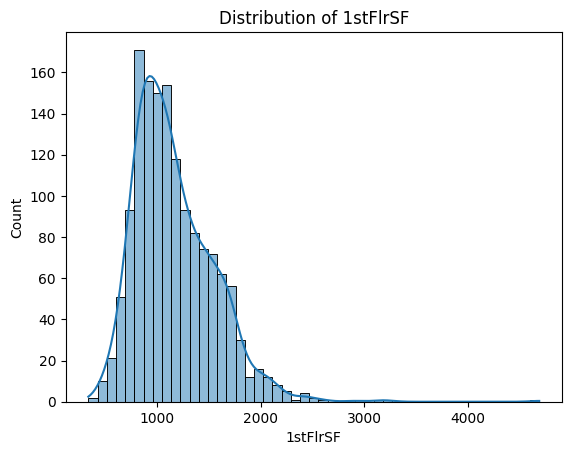

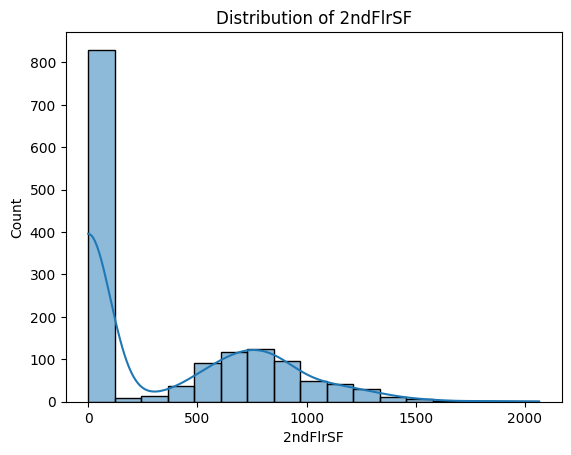

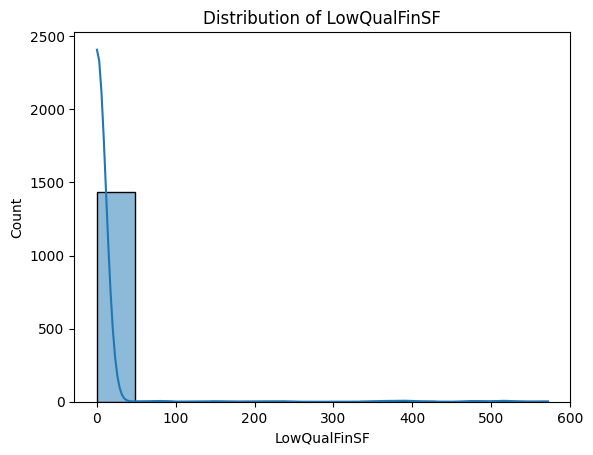

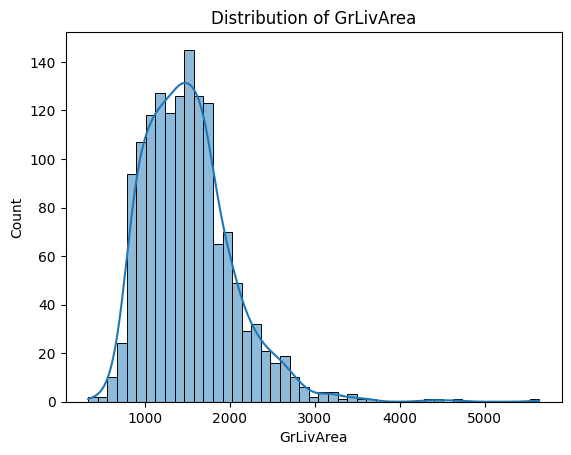

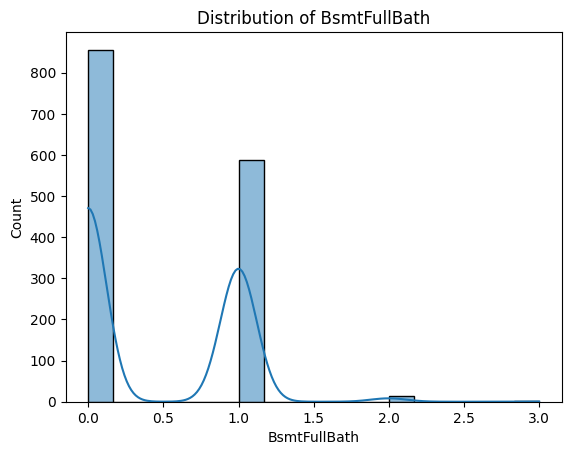

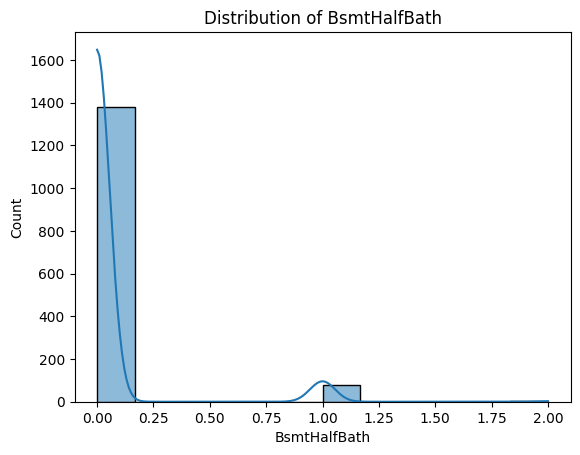

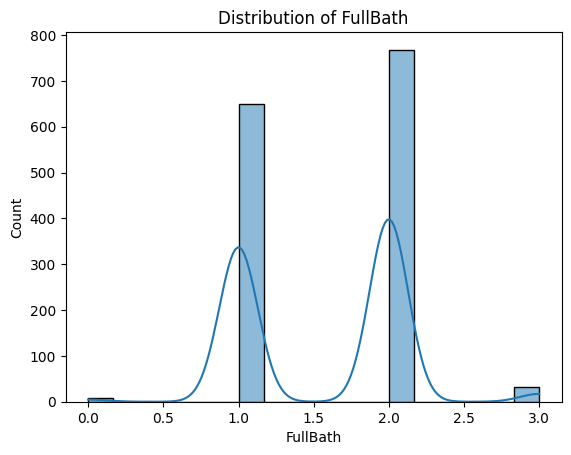

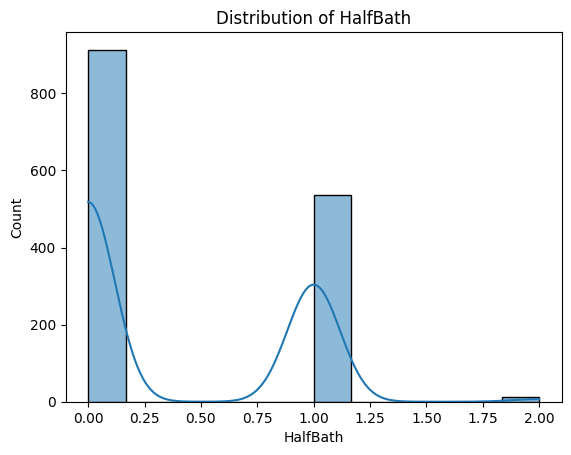

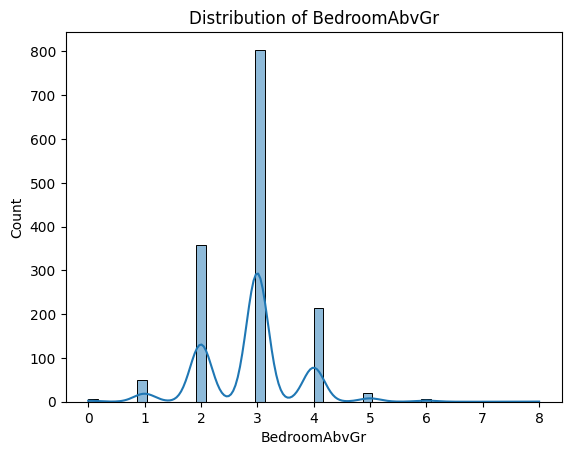

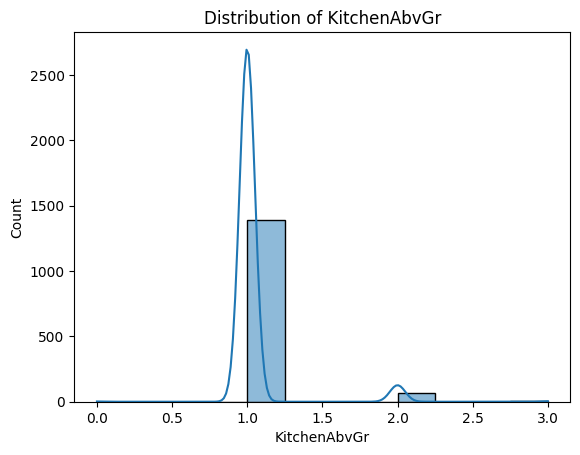

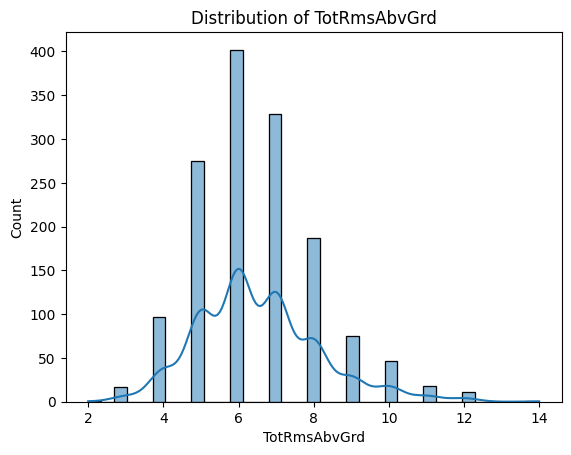

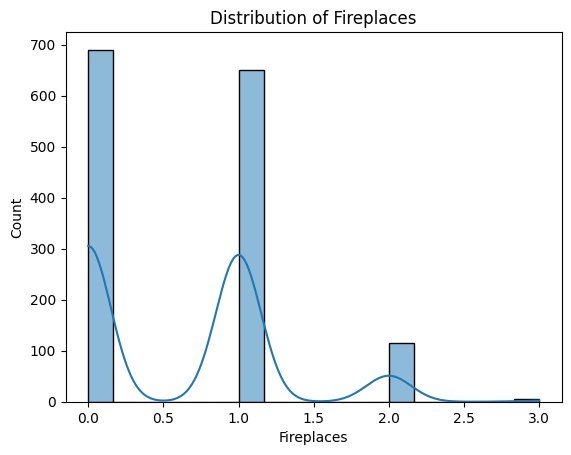

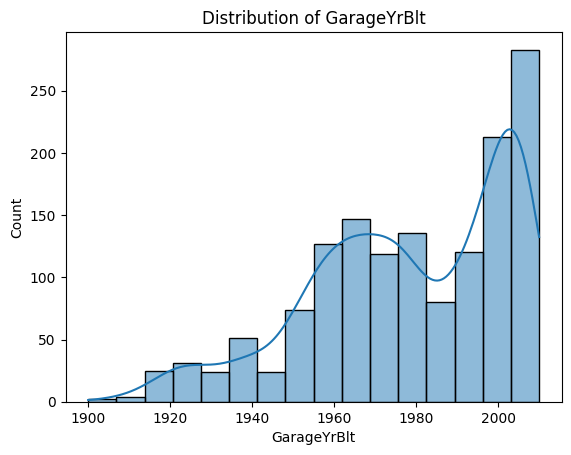

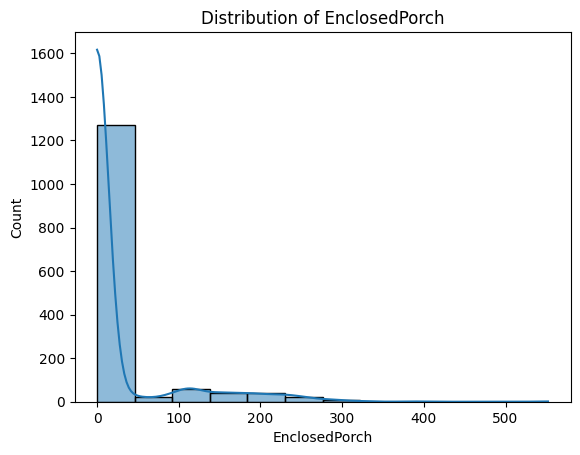

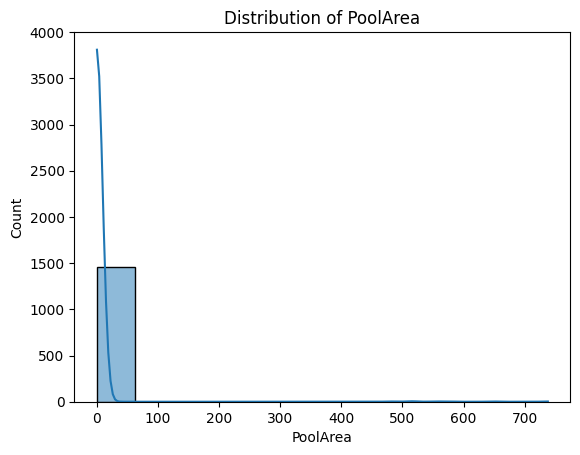

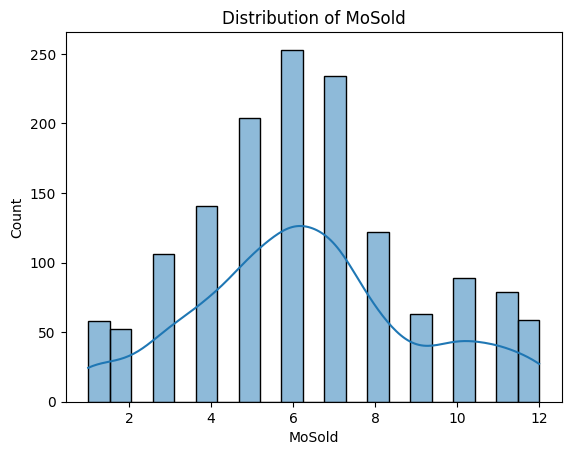

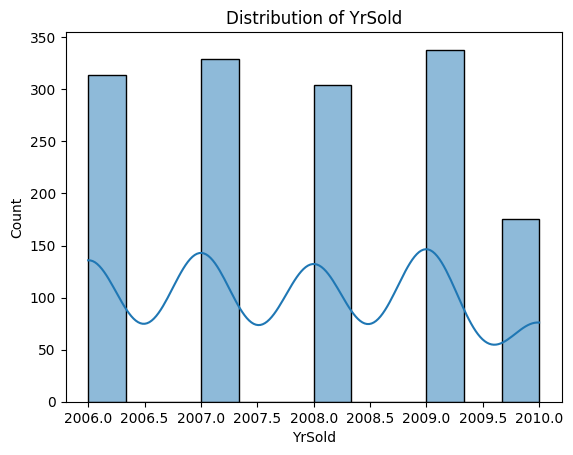

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Visualize Distributions
numeric_features = train_data.select_dtypes(include=[np.number]).columns
for feature in numeric_features:
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [44]:
# Handle Missing Values
missing_values = train_data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Drop columns with too many missing values or not relevant
# data.drop(['Column1', 'Column2'], axis=1, inplace=True)

Missing Values:
Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


In [45]:
# Feature Selection
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'SalePrice']

# Split Data
X = train_data[selected_features].values
y = train_data['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1168, 7)
Shape of X_test: (292, 7)
Shape of y_train: (1168,)
Shape of y_test: (292,)


In [48]:
# Train the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error: 1.066475979065242e-11
Mean Squared Error: 3.03133366397515e-22
Root Mean Squared Error: 1.7410725613756453e-11
R-squared (R2) Score: 1.0


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


##Description:

I chose BERT (Bidirectional Encoder Representations of Transformers) as a sentiment analysis model using a pre-trained language model (PLM) from the Hugging Face Repository. BERT is a transformer-based model with good performance for various NLP tasks, including sentiment analysis.

Original pre-training data sources: BERT is pre-trained on thelarge text dataset of BooksCorpus (800 million words) andnglish. Wikipedia (2.5 billion words). It uses hidden language model (MLM) and next sentence prediction (NSP) targets during pre-training.

Number of parameters: BERT base has 110 million parameters,dum BERT large has 340 million parameters. There are also smallerversions such as BERT-small and BERT-mini, which have fewer parameters to speed up inference.

Task-specific configuration: BERT can be fine-tuned for later tasks such as sentiment analysis, text classification. , called entity detection, and more changes. Fine-tuning involves \initializing the BERT model with pretrained weights and then training it with task-specific\data to adapt it to a specific task. This fine-tuning process allows BERT to use pre-trained data and learn task-specific models from the data..

In [5]:
# Write your code here
from transformers import pipeline

# Load the dataset
data = pd.read_csv("/content/sentiment_imdb_reviews.csv")

# Initialize the zero-shot classification pipeline with the BERT model
classifier = pipeline("zero-shot-classification", model="bert-base-uncased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


In [9]:
# Make predictions for each review
predictions = []
for review in data['Clean_Review']:
    result = classifier(review, candidate_labels=["positive", "negative", "neutral"])
    predictions.append(result['labels'][0])

# Convert ground truths to numerical labels
label_map = {"positive": 2, "negative": 1, "neutral": 0}
ground_truths = data['sentiment'].map(label_map)

# Convert predictions to numerical labels
predictions_numerical = [label_map[label] for label in predictions]

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support

# Evaluate performance
accuracy = accuracy_score(ground_truths, predictions_numerical)
precision, recall, f1, _ = precision_recall_fscore_support(ground_truths, predictions_numerical, average='weighted')

# Print evaluation metrics
print("Accuracy:", round(accuracy*100), "%")
print("Precision:", round(precision*100), "%")
print("Recall:", round(recall*100), "%")
print("F1 Score:", round(f1*100), "%")

Accuracy: 28 %
Precision: 17 %
Recall: 28 %
F1 Score: 19 %


##Advantages & Disadvantages

BERT offers related understanding, enabling accurate sentiment analysis by capturing bidirectional context. Its transfer learning capability allows fine-tuning for sentiment tasks with limited labeled data. With this performance, BERT is flexible, handling various input types.

However, its computational demand and large model size pose challenges for positioning, requiring significant resources. Additionally, interpretability is limited compared to simpler models. Fine-tuning BERT on small datasets risks overfitting. Challenges include data preprocessing complexities, hyperparameter tuning, and resource constraints. Despite these, BERT remains a potent tool for sentiment analysis, with ongoing research enhancing its effectiveness.